# ADA - Projeto: Técnicas de Programação I

## Professor: Alex Lima 

## Grupo 6:

*   Anna Vithória 
*   Adriana Augusta
*   Débora Gomes

### TEMA: Desmatamento e Queimadas na Amazônia Legal

[Fonte dos Dados](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation)


**Contexto**

  # DESMATAMENTO

Desde 1988, o programa
[PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)  (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite), em parceria com o Ministério do Meio Ambiente (MMA) e do Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis (IBAMA) monitora o desmatamento da Floresta Amazônica. Os dados divulgados fornecem as taxas de desmatamento anual, em km^2, para cada Unidade Federativa na qual a Floresta Amazônica está inserida. Essas medidas levam em consideração o decréscimo territorial da Amazônia Legal.

   
Esse conjunto de dados tem informações sobre o número de casos afetados, óbitos e recuperação do novo coronavírus de 2019. Por favor, note que esses dados foram obtidos de https://www.worldometers.info/coronavirus/ e são apenas para fins educativos.

# **Degradação da Floresta Amazônica**



A **Amazônia** compreende um conjunto de ecossistemas que envolve a bacia
hidrográfica do Rio Amazonas, bem como a Floresta Amazônica; é considerada a
região de maior biodiversidade do planeta e o maior bioma do Brasil. Não é exclusivamente brasileira, sendo, portanto, encontrada em outros países.





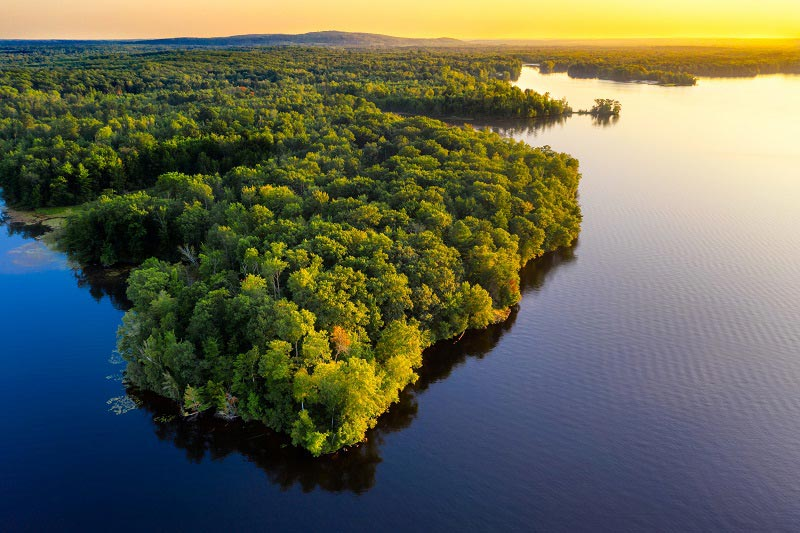

A **Floresta Amazônica**, considerada a maior floresta tropical do mundo, abrange uma área de mais de 5 milhões de km2. A floresta, que conta com um elevado número de espécies (animais e vegetais), é, então, rica em biodiversidade. Essa floresta é importante para a manutenção do equilíbrio ambiental e climático do mundo. Ela fornece diversos recursos naturais para a sociedade, mas sofre com vários problemas ambientais, como os desmatamentos, as queimadas e a biopirataria. Alem disso, há a  Amazônia Legal que é uma delimitação territorial criada pelo governo do Brasil para promover ações específicas para esse bioma.

## Carregando os Dados

In [1]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
desmatamento_df = pd.read_csv('def_area_2004_2019.csv')
queimadas_df = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
ninos_df = pd.read_csv('el_nino_la_nina_1999_2019.csv')

### Analisando o dataset de desmatamento:

In [3]:
desmatamento_df.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [4]:
desmatamento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano/Estados  16 non-null     int64
 1   AC           16 non-null     int64
 2   AM           16 non-null     int64
 3   AP           16 non-null     int64
 4   MA           16 non-null     int64
 5   MT           16 non-null     int64
 6   PA           16 non-null     int64
 7   RO           16 non-null     int64
 8   RR           16 non-null     int64
 9   TO           16 non-null     int64
 10  AMZ LEGAL    16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [5]:
desmatamento_df.rename( {'Ano/Estados':'year','AMZ LEGAL':'total'}, axis=1, inplace=True)
desmatamento_df.head()

,year,AC,AM,AP,MA,MT,PA,RO,RR,TO,total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [6]:
desmatamento_df.iloc[:,1:].describe()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,total
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


In [7]:
desmatamento_df['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

# `Modificar`

No dataset acima temos dados de desmatamento nos estados brasileiros que compõem a Amazônia Legal, com areas desmatadas em km2 nos anos de 2004 a 2019. Nele os atributos são:

1.   Ano = 2004 a 2019
2.   Estado = 'Acre', 'Amazonia', 'Amapa', 'Maranhão', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'
3.   Total

Não há valores nulos ou duplicados, todas as observações são inteiras, nesse caso há 16 linhas e 11 colunas, listadas anteriormente.

### Analisando o dataset de queimadas:

In [8]:
queimadas_df

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [9]:
queimadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [10]:
queimadas_df.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


In [11]:
queimadas_df['state'].unique()

array(['AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA',
       'RORAIMA', 'AMAPA', 'TOCANTINS', 'ACRE'], dtype=object)

In [12]:
nome_sigla = {'AMAZONAS':'AM', 'MARANHAO': 'MA', 'MATO GROSSO': 'MT', 'PARA':'PA',
             'RONDONIA':'RO','RORAIMA': 'RR', 'AMAPA': 'AP', 'TOCANTINS':'TO', 'ACRE':'AC'}

queimadas_df.insert(loc = 3,column = 'code',value = queimadas_df['state'].replace(nome_sigla)) 
queimadas_df

,year,month,state,code,latitude,longitude,firespots
0,1999,1,AMAZONAS,AM,-2.371113,-59.899933,3
1,1999,1,MARANHAO,MA,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,MT,-12.660633,-55.057989,18
3,1999,1,PARA,PA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,RO,-12.861700,-60.513100,1
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,MT,-12.138385,-56.066297,148
2100,2019,12,PARA,PA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,RO,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,RR,2.856667,-60.431963,27


In [13]:
queimadas_df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [14]:
queimadas_df2 = queimadas_df[queimadas_df['year'] > 2003]
queimadas_df2

,year,month,state,code,latitude,longitude,firespots
455,2004,1,AMAPA,AP,0.131862,-51.642086,58
456,2004,1,AMAZONAS,AM,-0.761964,-64.503152,277
457,2004,1,MARANHAO,MA,-3.133702,-45.985558,242
458,2004,1,MATO GROSSO,MT,-12.428064,-55.528333,171
459,2004,1,PARA,PA,-2.370078,-50.867593,875
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,MT,-12.138385,-56.066297,148
2100,2019,12,PARA,PA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,RO,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,RR,2.856667,-60.431963,27


# `Modificar`

No dataset acima temos dados de queimadas nos estados brasileiros que compõem a Amazônia Legal, com areas desmatadas em km2 nos anos de 2004 a 2019. Nele os atributos são:

1.   Ano = 2004 a 2019
2.   Estado = 'Acre', 'Amazonia', 'Amapa', 'Maranhão', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'
3.   Total

Não há valores nulos ou duplicados, todas as observações são inteiras, nesse caso há 16 linhas e 11 colunas, listadas anteriormente.

### Analisando o dataset de El Niño e La Niña

In [15]:
ninos_df.head()

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate


In [16]:
ninos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start year  16 non-null     int64 
 1   end year    16 non-null     int64 
 2   phenomenon  16 non-null     object
 3   severity    16 non-null     object
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [17]:
ninos_df2 = ninos_df.sort_values('start year',ignore_index=True)
ninos_df2.drop('end year',axis=1,inplace=True)
ninos_df2.rename({'start year':'year'},axis=1,inplace=True)
ninos_df2

,year,phenomenon,severity
0,1999,La Nina,Strong
1,2000,La Nina,Weak
2,2002,El Nino,Moderate
3,2004,El Nino,Weak
4,2005,La Nina,Weak
5,2006,El Nino,Weak
6,2007,La Nina,Strong
7,2008,La Nina,Weak
8,2009,El Nino,Moderate
9,2010,La Nina,Strong


# `Modificar`

No dataset acima temos dados de desmatamento nos estados brasileiros que compõem a Amazônia Legal, com areas desmatadas em km2 nos anos de 2004 a 2019. Nele os atributos são:

1.   Ano = 2004 a 2019
2.   Estado = 'Acre', 'Amazonia', 'Amapa', 'Maranhão', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins'
3.   Total

Não há valores nulos ou duplicados, todas as observações são inteiras, nesse caso há 16 linhas e 11 colunas, listadas anteriormente.

Precisa retiara algumas informações como

 PORCENTAGEM DE REDUÇÃO ENTRE 2004 E 2012
 - EM 2004 QUAL ESTADO DESMATOU MAIS E QUE PORCENTAGEM
 - DURANTE O PERIODO QUAL ESTADO APRESENTOU MAIOR REDUÇÃO NOS NUMEROS
 - Aumento em 2019 é o maior desde de 2008 quanto aumentou
 - No ano de 20019 qual estato mais contribuiu com o aumento

 as estatisticas estao aqui embaixo plotar os graficos para os estados ajuda, assim como fazer um comparativo de cada estado com o total

# Análise Exploratória dos Dados (EDA)

<Axes: xlabel='Sigla', ylabel='Área Desmatada (km2)'>

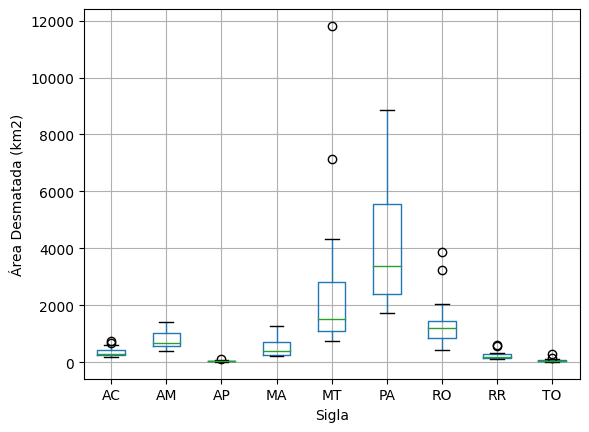

In [18]:
desmatamento_df.iloc[:,1:-1].boxplot(xlabel='Sigla',ylabel='Área Desmatada (km2)')

Nesse gráfico de caixa (boxplot), vemos: 
- a faixa de variação na area desmatada em cada estado;
- a ocorrência de outliers em alguns estados;
- a dispersão (variação) mais ampla em alguns estados.

As maiores ocorrências bem como as maiores variações de desmatamento ocorreram em MT e PA.

In [19]:
desmatamento_df.iloc[:,:-1].plot(x='year',
                            xlabel='Ano',ylabel='Área Desmatada (km2)')

<Axes: xlabel='Ano', ylabel='Área Desmatada (km2)'>

**Amazonia Legal:** A média de area desvastada no AM Legal  foi de 10020.94km2, onde o menor indice foi de 4571km2 no ao de 2009 por sua vez a maior area desmatada foi 27772 km2 no aos de 2004 e nesse periodo o total  das areas desmatadas foi de 160335 Km2

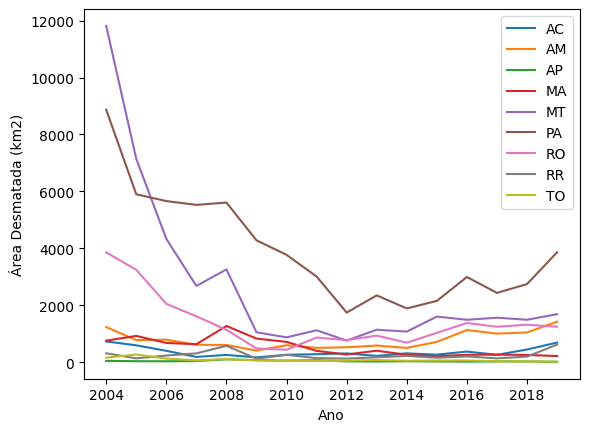

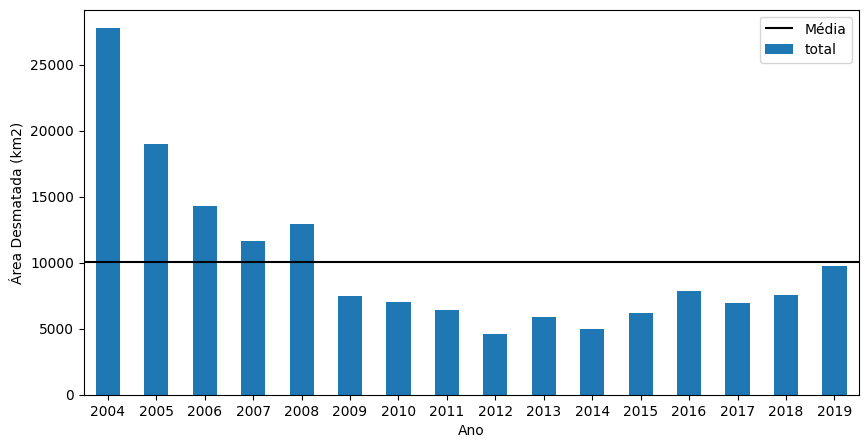

In [20]:
desmatamento_df.plot(kind = 'bar',x='year',y="total",
                    figsize=(10,5),rot=0,
                    xlabel='Ano', ylabel='Área Desmatada (km2)'
                    )

plt.hlines(y=desmatamento_df['total'].mean(),xmin=-1,xmax=17,label='Média',color='k')
plt.legend()
plt.show()

### Falta fazer:
- Calcular a contribuição de cada estado em relação ao total por ano.

In [21]:
info = desmatamento_df.iloc[:,1:-1].div(desmatamento_df['total'],axis=0)
#info = (info*100).round(2).astype(str) + '%'
info.index=desmatamento_df['year']
info.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO
year,,,,,,,,,
2004,0.026213,0.044361,0.001656,0.027186,0.425392,0.319386,0.138917,0.011198,0.005689
2005,0.031135,0.040759,0.001736,0.048491,0.375776,0.310245,0.170611,0.006995,0.014253
2006,0.027859,0.055159,0.002100,0.047179,0.303304,0.396122,0.143427,0.016170,0.008680
2007,0.015793,0.052356,0.003347,0.054158,0.229852,0.474294,0.138271,0.026521,0.005407
2008,0.019673,0.046782,0.007745,0.098443,0.252343,0.434281,0.087987,0.044458,0.008288


# QUEIMADAS

Os dados a seguir são de focos de queimadas na floresta entre os anos 1999 e 2019, adicionado a isso vamos tentar mostrar o impacto que os fenomenos La Nina e El Nino causam na floresta, isso se deve por os fenômenos provocarem secas ou chuvas em todo o país.

O El Nino na região Norte do país, onde esta localizada a floresta, causa secas severas, assim pode impactar no número de focos de queimadas ou a propagação das mesmas. Já o La Nina causa volumes maiores de chuva, aumentando a umidade e ocorrência de frentes frias.